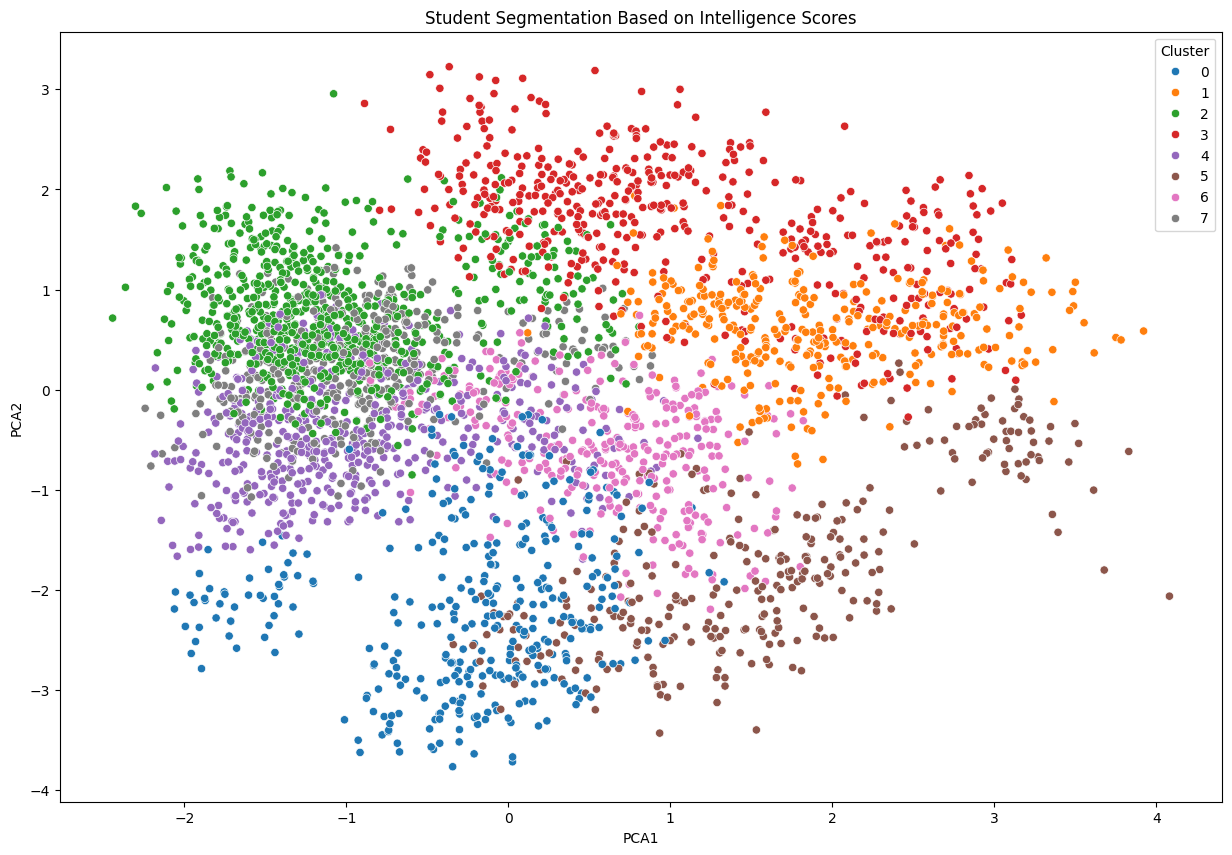

Cluster
0    362
1    346
2    779
3    488
4    534
5    299
6    334
7    458
Name: count, dtype: int64


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the data
df = pd.read_excel(r'C:\Users\dhruv\Documents\internship\Project 3\Dataset Project 404.xlsx', engine='openpyxl')

# Clean column names
df.columns = df.columns.str.strip()

# Select only the intelligence scores
intelligence_cols = ['Linguistic', 'Musical', 'Bodily', 'Logical - Mathematical',
                     'Spatial-Visualization', 'Interpersonal', 'Intrapersonal', 'Naturalist']
X = df[intelligence_cols].copy()

# Drop rows with missing intelligence scores
X.dropna(inplace=True)

# Keep the matching student IDs
df_filtered = df.loc[X.index].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering (8 clusters)
kmeans = KMeans(n_clusters=8, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_filtered['PCA1'] = pca_result[:, 0]
df_filtered['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(15,10))
sns.scatterplot(data=df_filtered, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Student Segmentation Based on Intelligence Scores')
plt.show()

# Count of students in each cluster
print(df_filtered['Cluster'].value_counts().sort_index())

# Save the result
# df_filtered.to_excel('students_clustered_by_intelligence.xlsx', index=False)


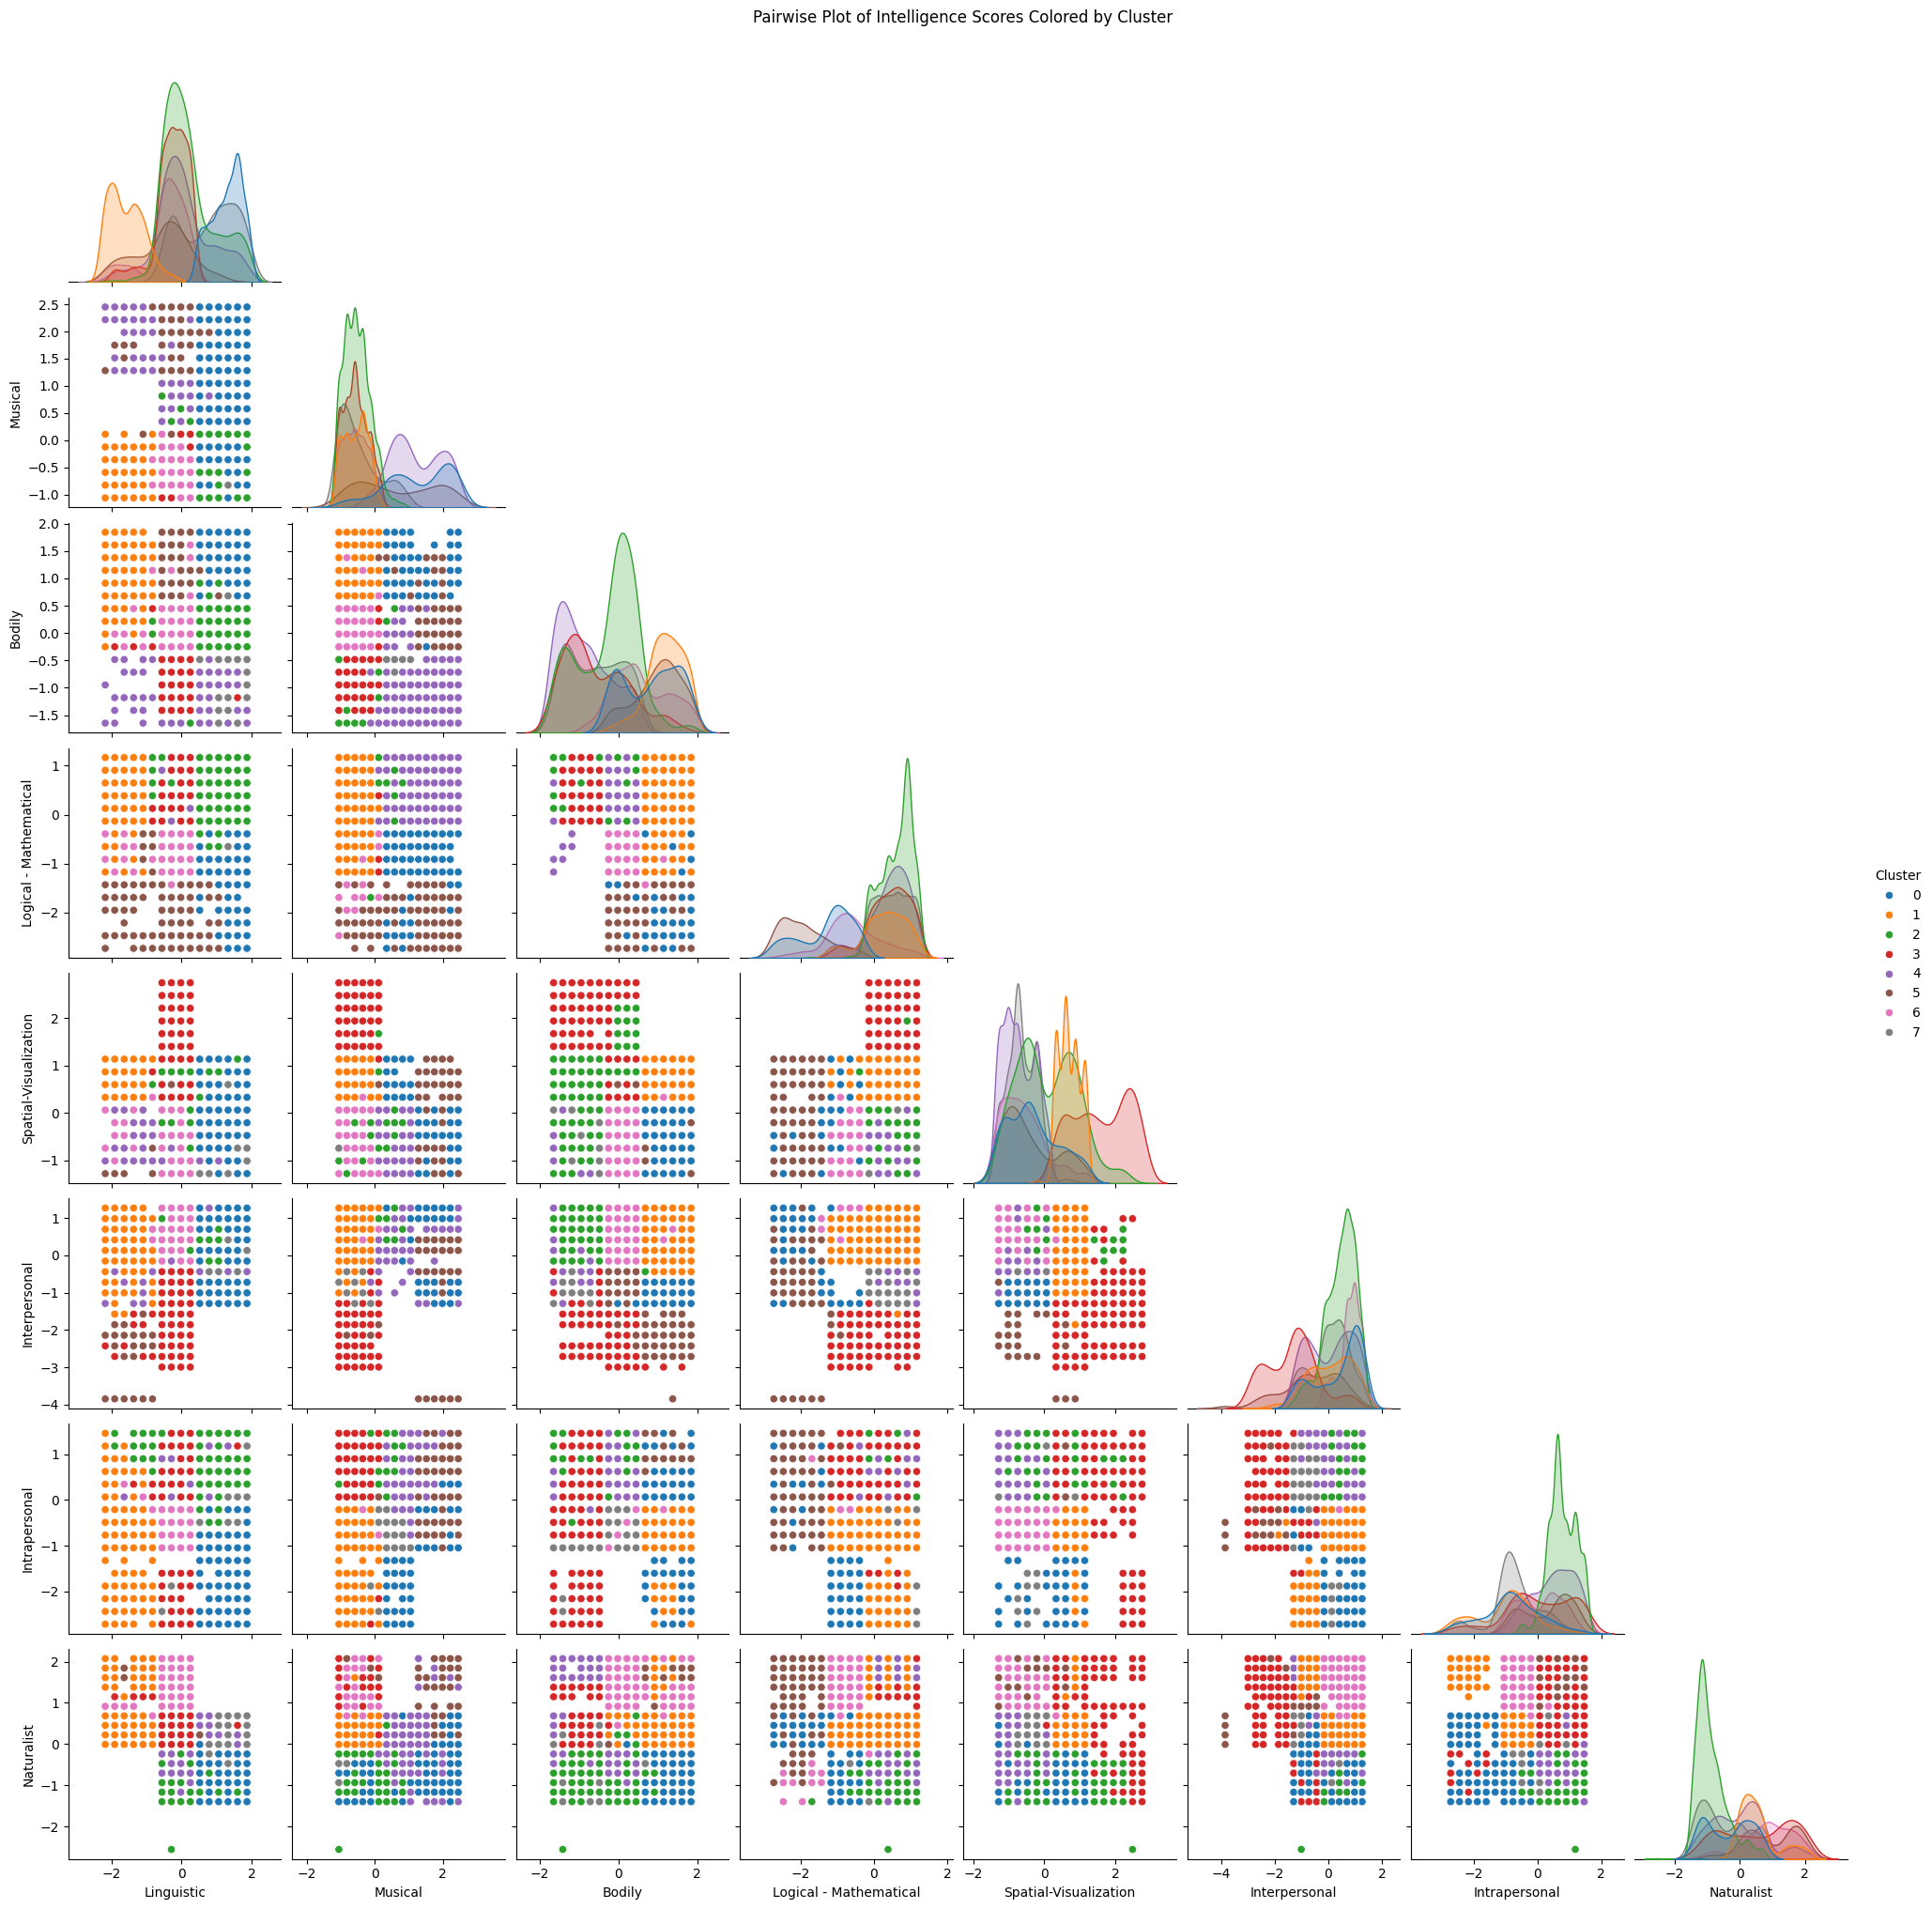

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Join scaled features back to DataFrame for plotting
intelligence_df = pd.DataFrame(X_scaled, columns=intelligence_cols, index=df_filtered.index)
intelligence_df['Cluster'] = df_filtered['Cluster']

# Plot pairplot
sns.pairplot(intelligence_df, hue='Cluster', palette='tab10', diag_kind='kde', corner=True)
plt.suptitle("Pairwise Plot of Intelligence Scores Colored by Cluster", y=1.02)
plt.show()
